In [13]:
import sys
import os

sys.path.append(os.path.abspath(".."))

from src.datasets.vindr_whole import VINDR_Dataset
from src.config import image_size

from torchvision.transforms import Compose, Resize, ToTensor, Normalize
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

## Data Loading and Preprocessing

In this section, we define transformations, specify dataset paths, and create a PyTorch DataLoader to handle batch processing.

### Define a series of transformations

In [8]:
transform = Compose([
    ToTensor(),  # Convert image to a PyTorch tensor
    Resize((image_size, image_size), antialias=True),  # Resize image to image_sizeximage_size pixels while preserving quality
    Normalize(0.007, 0.01)  # Normalize pixel values with mean=0.007 and std=0.01
])

### Specify the file paths for annotations (CSV) and images

In [9]:
csv_path = '/data/vindr-mammo-a-large-scale-benchmark-dataset-for-computer-aided-detection-and-diagnosis-in-full-field-digital-mammography-1.0.0/finding_annotations.csv'
images_path = '/data/vindr-mammo-a-large-scale-benchmark-dataset-for-computer-aided-detection-and-diagnosis-in-full-field-digital-mammography-1.0.0/images/'

### Initialize dataset and dataloader

In [12]:
dataset = VINDR_Dataset(csv_path, images_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=1)

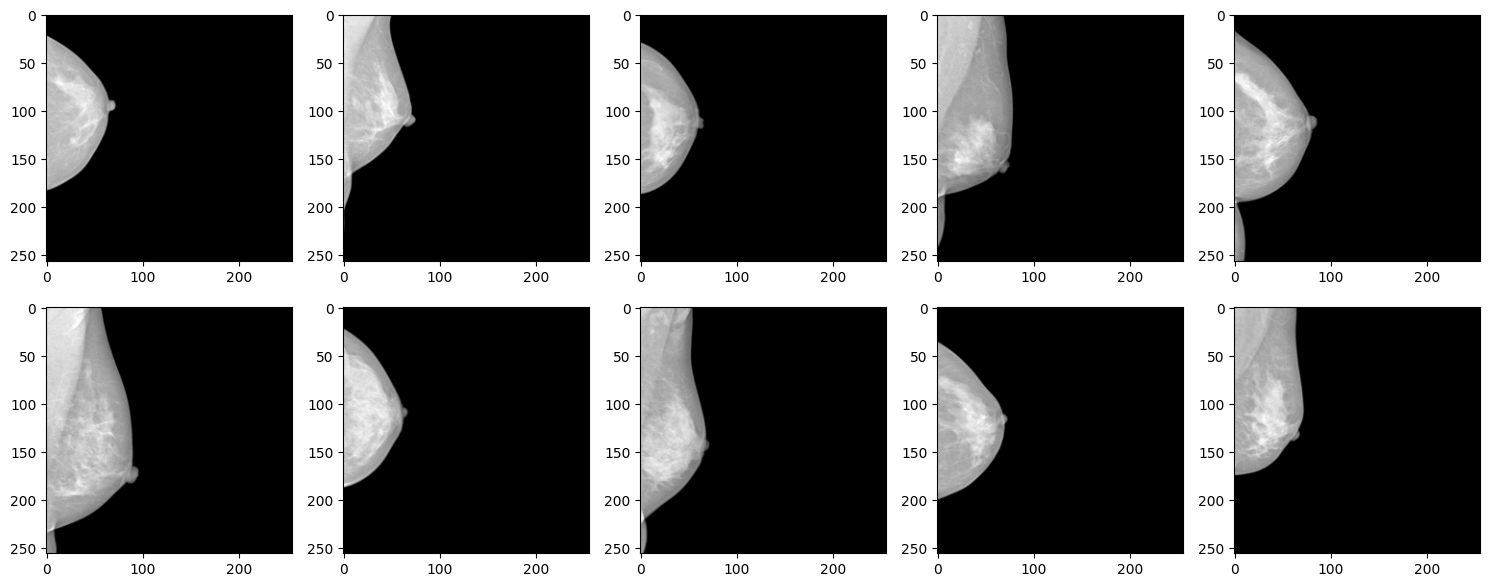

In [19]:
# Create a figure with a 2x5 grid
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows, 5 columns

# Iterate over 10 images (2x5 grid)
for batch_idx, x in enumerate(dataloader):  
    if batch_idx >= 10:  # Stop after 10 images
        break

    arr = x[0].numpy()[0, :, :]  # Convert tensor to numpy array

    # Get the subplot position
    row = batch_idx // 5  # Row index (0 or 1)
    col = batch_idx % 5   # Column index (0-4)

    axes[row, col].imshow(arr, cmap='gray')  # Plot in grayscale
#     axes[row, col].axis("off")  # Remove axis labels

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the entire figure at once